In [2]:
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
USER = 'xxx@yyy.com' #your HMD user name
PSWD = '1111111111' #your HMW password

In [14]:
def data_hmd(user, pswd, country='FRATNP', data_type='Mx', start_year=1946):
    
    """
    This function downloads the mortality data from Human Mortality Database (www.mortality.org)
    
    Parameters:
    -----------
    user - str 
    pswd - str
    country - str
    data_type - str
    start_year - str

    Returns:
    --------
    df_m - data frame with mortality data for male population
    df_f - data frame with mortality data for female population
    df_t - data frame with mortality data for total population
    """

    url = 'https://www.mortality.org/hmd/' + country + '/STATS/' + data_type + '_1x1.txt'
    r = requests.get(url, auth=(user, pswd))
    data = r.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(data), skiprows=[0], delim_whitespace=True)
    df['Age'] = df['Age'].str.replace('+','').astype(int) #remove all '+' signs from the age
    df = df[df.Year >= start_year]
    df_m = df.pivot(index='Age', columns='Year', values='Male')
    df_f = df.pivot(index='Age', columns='Year', values='Female')
    df_t = df.pivot(index='Age', columns='Year', values='Total')
    df_m.index = range(0, len(df_m.index))
    df_f.index = range(0, len(df_f.index))
    df_t.index = range(0, len(df_t.index))
    
    df_m.index.name = 'Age'
    df_f.index.name = 'Age'
    df_t.index.name = 'Age'

    return df_m, df_f, df_t

In [15]:
#get data from Human Mortality Database - throw away female and male specific data
mort_male, mort_female, mort_total = data_hmd(USER, PSWD, country="POL", start_year=1958)

#write into external data
mort_male.to_csv('./data/mort_male_raw.csv')
mort_female.to_csv('./data/mort_female_raw.csv')
mort_total.to_csv('./data/mort_total_raw.csv')

In [16]:
mort_male.head()

Year,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,,,,,,,,,,,,,,,
0,0.083710,0.082573,0.064723,0.061334,0.062276,0.056428,0.053927,0.047667,0.044346,0.043492,...,0.005832,0.005328,0.005006,0.005027,0.004945,0.004657,0.004432,0.004612,0.004553,0.004194
1,0.005034,0.005190,0.003490,0.003763,0.003266,0.003334,0.002980,0.002647,0.002514,0.002363,...,0.000327,0.000350,0.000318,0.000294,0.000267,0.000293,0.000330,0.000246,0.000306,0.000260
2,0.002034,0.001970,0.001676,0.001628,0.001556,0.001447,0.001251,0.001244,0.001173,0.001277,...,0.000252,0.000220,0.000193,0.000276,0.000207,0.000153,0.000170,0.000173,0.000151,0.000166
3,0.001463,0.001448,0.001115,0.001115,0.001060,0.001128,0.000828,0.000899,0.000958,0.000914,...,0.000151,0.000124,0.000205,0.000197,0.000188,0.000125,0.000148,0.000165,0.000131,0.000161
4,0.001073,0.001081,0.000875,0.000859,0.000869,0.000967,0.000771,0.000826,0.000766,0.000740,...,0.000117,0.000135,0.000153,0.000145,0.000130,0.000124,0.000106,0.000138,0.000139,0.000083


In [17]:
age_range = range(0,101)
train_range = range(1958,2001)
test_range = range(2001,2019)

def extract_data(df, age_rng, year_rng):
    return df.loc[age_rng, year_rng].astype(float)

#male population
mort_male_train = extract_data(mort_male, age_range, train_range)
mort_male_test = extract_data(mort_male, age_range, test_range)

#female population
mort_female_train = extract_data(mort_female, age_range, train_range)
mort_female_test = extract_data(mort_female, age_range, test_range)

#total population
mort_total_train = extract_data(mort_total, age_range, train_range)
mort_total_test = extract_data(mort_total, age_range, test_range)

#write into external data
mort_male_train.to_csv('./data/mort_male_train.csv')
mort_male_test.to_csv('./data/mort_male_test.csv')
mort_female_train.to_csv('./data/mort_female_train.csv')
mort_female_test.to_csv('./data/mort_female_test.csv')
mort_total_train.to_csv('./data/mort_total_train.csv')
mort_total_test.to_csv('./data/mort_total_test.csv')

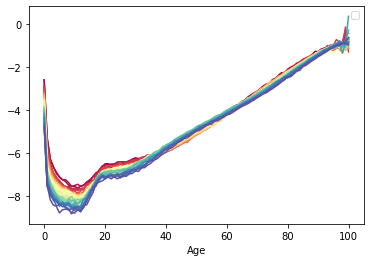

In [18]:
#plot sample data set
np.log(mort_total_train).plot(cmap='Spectral')
plt.legend('')
plt.show()